In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = untar_data(URLs.PETS)
path

WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet')

In [4]:
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/abhis/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [7]:
data = ImageDataBunch.from_name_re(
    path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\abhis\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\abhis\.fastai\data\oxford-iiit-pet\images;

Test: None

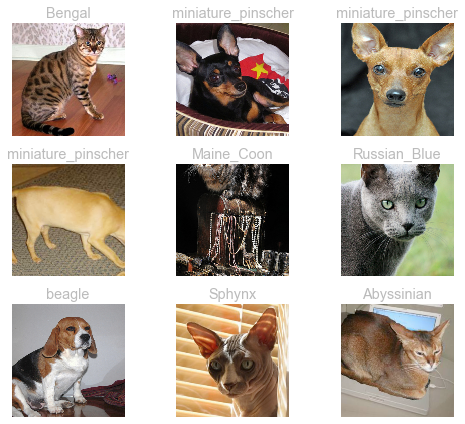

In [8]:
data.show_batch(rows=3, figsize=(7, 6))

In [9]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [10]:
len(data.classes), data.c

(37, 37)

In [13]:
learn = cnn_learner(data,models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\abhis/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|███████████████████████████████████████████████| 102502400/102502400 [01:53<00:00, 906988.77it/s]


In [14]:
learn.fit_one_cycle(4)

In [17]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

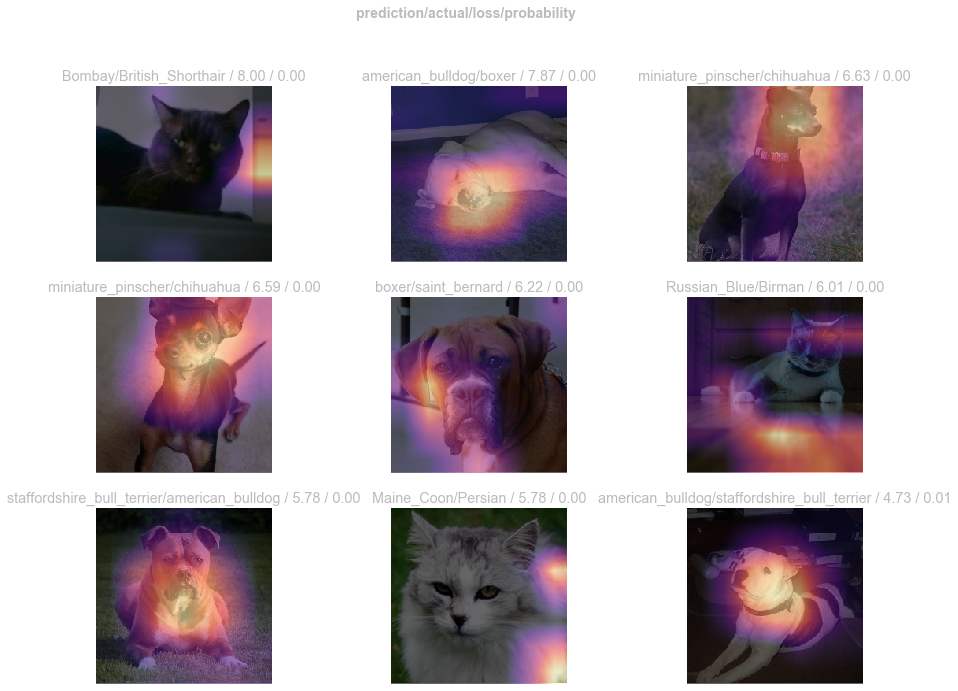

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

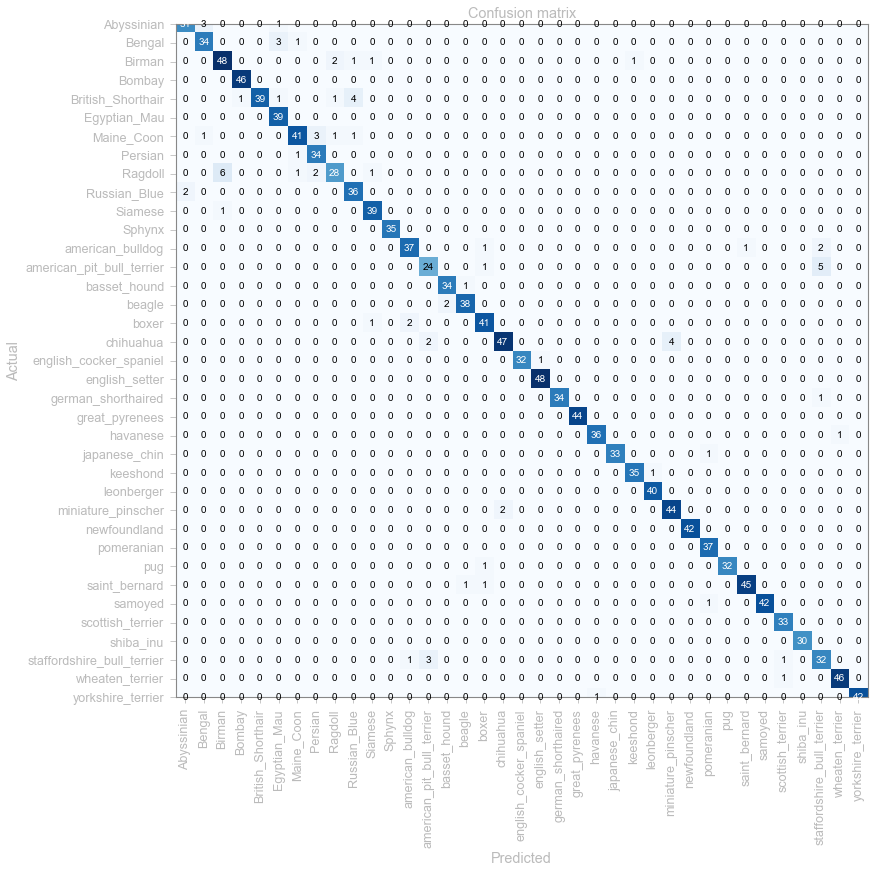

In [19]:
interp.plot_confusion_matrix(figsize=(12,12))

In [20]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Persian', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [56]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\abhis\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\abhis\.fastai\data\oxford-iiit-pet\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1):

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


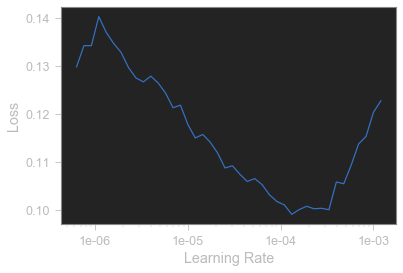

In [50]:
learn.recorder.plot()

In [51]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=1e-04)

In [52]:
learn.save('stage-3')

In [25]:
images_array=[]

In [26]:
predicPath = 'D:\\workspace\\Machine Learning\\deeeeeeeeep learning\\cat_pics\\'
import os

['5393a1d8-f410-4f9e-a109-122502205ff0.jpg', '72c50d43-1461-44b7-9edc-01b919259199.jpg', '82924425-2c0a-4108-ac6b-b3e1b4863584.jpg', 'a512eb31-d67d-4e71-9a3f-cfbb8345e134.jpg', 'e3e734d6-b01f-4742-a630-338321599106.jpg', 'IMG_0606.jpg', 'IMG_0616.jpg', 'IMG_2960.jpg', 'IMG_3003.jpg', 'IMG_3033.jpg', 'IMG_3034.jpg', 'IMG_3345.jpg', 'IMG_7457.JPG', 'train1.jpg', 'train2.jpg', 'train3.jpg', 'train4.jpg']


SCORE : 10/17


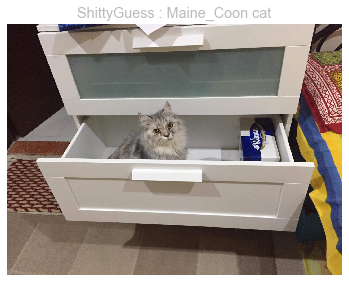

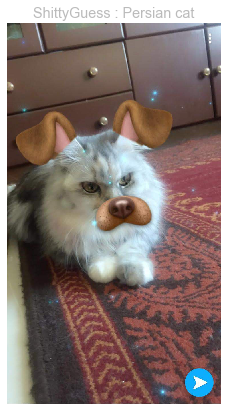

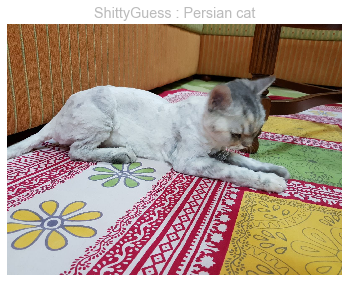

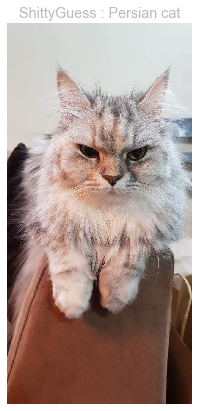

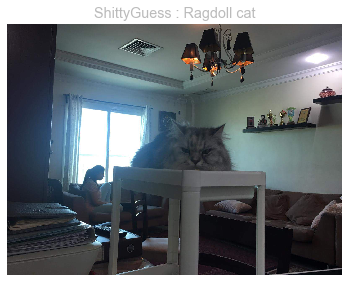

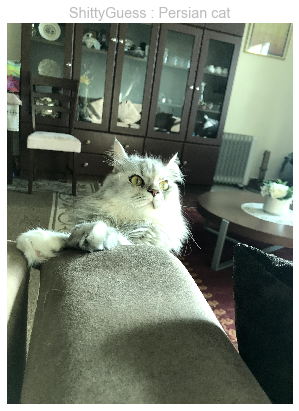

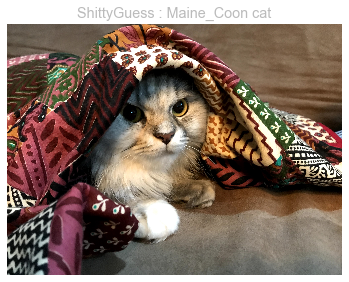

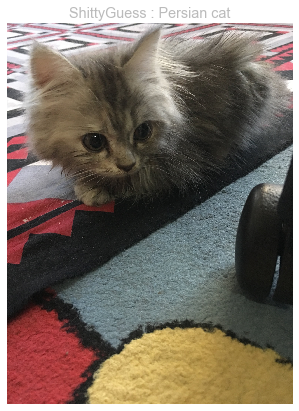

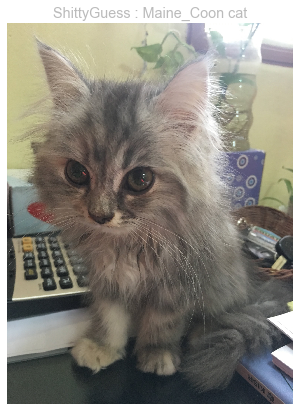

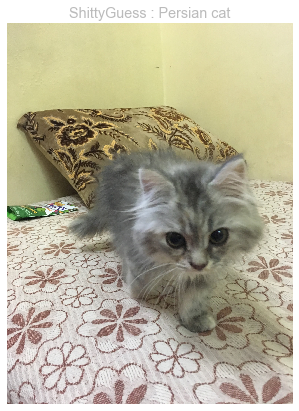

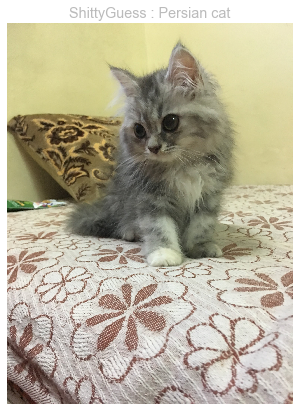

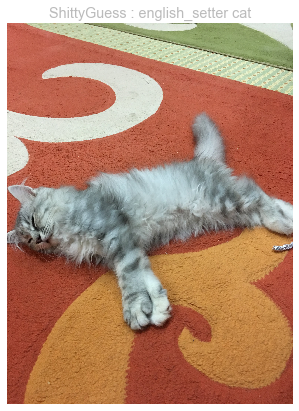

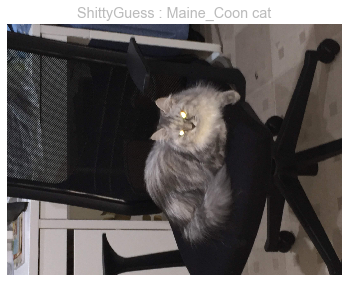

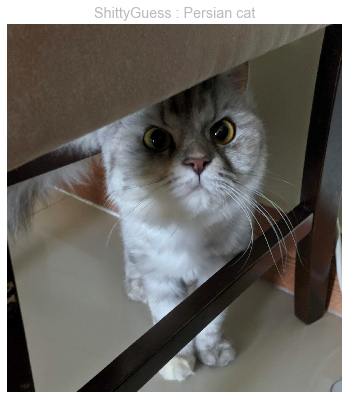

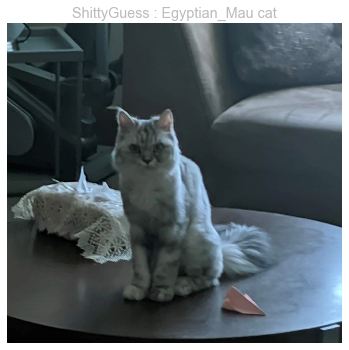

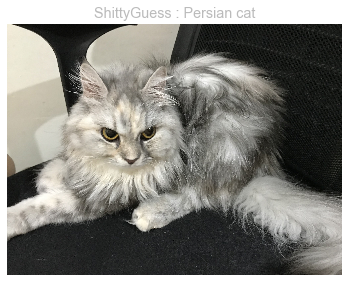

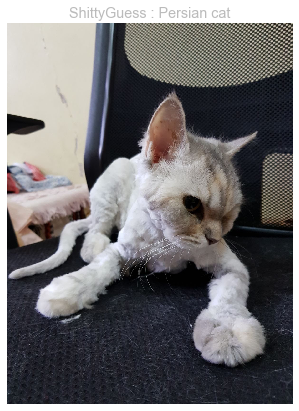

In [59]:
waiel_cat_pics = os.listdir(predicPath)
print(waiel_cat_pics)
co=0 
for file in waiel_cat_pics:
    curr_guess = learn.predict(open_image(predicPath+file))
    if('{}'.format(curr_guess[0])=='Persian'):
        co+=1
    shittyguess = 'ShittyGuess : {} cat'.format(curr_guess[0])
    (open_image(predicPath+file)).show(figsize=(6,7), title=shittyguess)
print("\n\nSCORE : {}/{}".format(co,len(waiel_cat_pics)))